In [5]:
param_columns = ['ams_grad',
                'batch_size',
                'eps_decay',
                'eps_end',
                'eps_start',
                'gamma',
                'learning_rate',
                'memory_buffer',
                'targetnet_update_rate']

In [6]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np


df_strict = pd.read_excel('Strict_search_0.xlsx')
df_strict2 = pd.read_excel('Strict_search_short_4.xlsx')
df_strict = pd.concat([df_strict, df_strict2])
df_strict['avgRewards'] = df_strict['avgRewards'].apply(lambda x: ast.literal_eval(x))
df_strict2.tail() # shows top 5 rows

,Unnamed: 0,DQN_model,batch_size,gamma,eps_start,eps_end,eps_decay,learning_rate,memory_buffer,ams_grad,targetnet_update_rate,avgRewards,average_last_100_episodes,best_average_100_episodes,time_of_peak,time_to_convergence
122,123,1,32,0.80,0.8,0.10,1000,0.0001,1000,True,50,"[0.09090909090909091, 0.1, 0.3, 0.0, 0.1, 0.4,...",0.86,0.93,4680,NaN
123,124,1,128,0.80,0.8,0.00,3000,0.0010,1000,True,50,"[0.0, 0.4, 0.4, 0.2, 0.4, 0.1, 0.2, 0.4, 0.3, ...",0.58,0.76,4180,NaN
124,125,1,256,0.99,1.0,0.05,1000,0.0001,5000,True,10,"[0.2727272727272727, 0.1, 0.4, 0.3, 0.2, 0.2, ...",0.92,0.97,4400,NaN
125,126,1,128,0.99,0.8,0.10,1000,0.0001,5000,True,10,"[0.0, 0.2, 0.0, 0.2, 0.1, 0.2, 0.3, 0.1, 0.3, ...",0.91,0.98,4020,NaN
126,127,1,256,0.90,1.0,0.00,2000,0.0010,5000,True,10,"[0.36363636363636365, 0.3, 0.2, 0.4, 0.3, 0.5,...",0.90,0.95,4460,NaN


In [7]:
len(df_strict2)

127

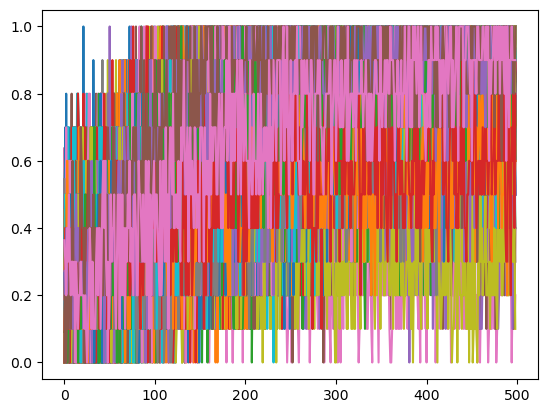

In [8]:
for i, row in df_strict.iterrows():
    plt.plot(row['avgRewards'])

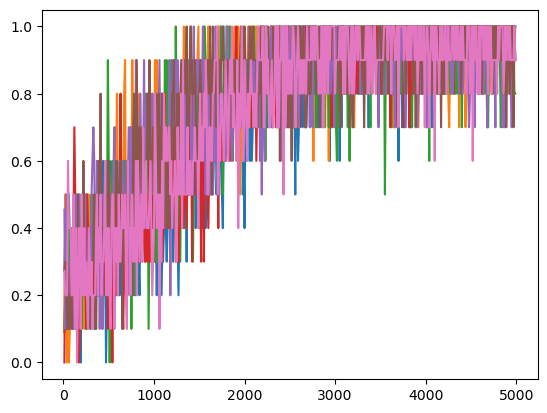

,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,DQN_model,...,eps_decay,learning_rate,memory_buffer,ams_grad,targetnet_update_rate,avgRewards,average_last_100_episodes,best_average_100_episodes,time_of_peak,time_to_convergence
27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,1,...,1000,0.0001,1000,True,10,"[0.2727272727272727, 0.4, 0.2, 0.3, 0.2, 0.5, ...",0.97,0.99,3190,NaN
20,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,21,1,...,1000,0.0010,5000,True,50,"[0.09090909090909091, 0.5, 0.3, 0.0, 0.2, 0.0,...",0.90,0.98,3560,NaN
28,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,29,1,...,1000,0.0001,1000,True,50,"[0.09090909090909091, 0.2, 0.1, 0.5, 0.3, 0.5,...",0.90,0.98,2740,NaN
58,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,59,1,...,1000,0.0001,5000,True,10,"[0.0, 0.4, 0.4, 0.1, 0.2, 0.1, 0.2, 0.3, 0.3, ...",0.95,0.98,3490,NaN
87,87.0,87.0,87.0,87.0,87.0,87.0,87.0,87.0,88,1,...,1000,0.0001,5000,False,10,"[0.45454545454545453, 0.1, 0.5, 0.4, 0.2, 0.1,...",0.89,0.97,3090,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,1,...,1000,0.0001,5000,True,10,"[0.2727272727272727, 0.3, 0.2, 0.1, 0.3, 0.1, ...",0.91,0.97,2620,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,1,...,1000,0.0001,5000,False,50,"[0.2727272727272727, 0.2, 0.2, 0.2, 0.6, 0.4, ...",0.94,0.97,3630,NaN


In [9]:
best = df_strict.nlargest(30, ['best_average_100_episodes'])
best_short = best[best['time_of_peak'] < 4000]


X = np.arange(10, 5000, 10)

for i, row in best_short.iterrows():
    plt.plot(X, row['avgRewards'])
plt.show()

best_short.head(20)

## FIRST SET

In [10]:
import os

df_ALL = pd.read_excel('Grid_search_0.xlsx')

folder = 'Grid_Results'
for excel in os.listdir(folder):
    df_temp = pd.read_excel(os.path.join(folder, excel))
    df_ALL = pd.concat([df_ALL, df_temp])

df_ALL['avgRewards'] = df_ALL['avgRewards'].apply(lambda x: ast.literal_eval(x))

df_ALL.head()

,Unnamed: 0,DQN_model,batch_size,gamma,eps_start,eps_end,eps_decay,learning_rate,memory_buffer,ams_grad,targetnet_update_rate,avgRewards,average_last_100_episodes,best_average_100_episodes,time_of_peak,time_to_convergence
0,1,0,32,0.8,0.8,0.00,1000,0.0010,1000,True,10,"[0.45454545454545453, 0.2, 0.1, 0.4, 0.2, 0.3,...",0.26,0.38,1920,NaN
1,2,0,32,0.8,0.8,0.00,1000,0.0010,1000,True,50,"[0.36363636363636365, 0.4, 0.3, 0.3, 0.3, 0.6,...",0.22,0.39,840,NaN
0,1,0,32,0.8,0.8,0.00,1000,0.0010,1000,True,10,"[0.45454545454545453, 0.2, 0.1, 0.4, 0.2, 0.3,...",0.26,0.38,1920,NaN
1,2,0,32,0.8,0.8,0.00,1000,0.0010,1000,True,50,"[0.36363636363636365, 0.4, 0.3, 0.3, 0.3, 0.6,...",0.22,0.39,840,NaN
0,1,1,256,0.8,0.8,0.05,1000,0.0001,1000,False,50,"[0.09090909090909091, 0.4, 0.1, 0.1, 0.1, 0.4,...",0.82,0.89,3370,NaN


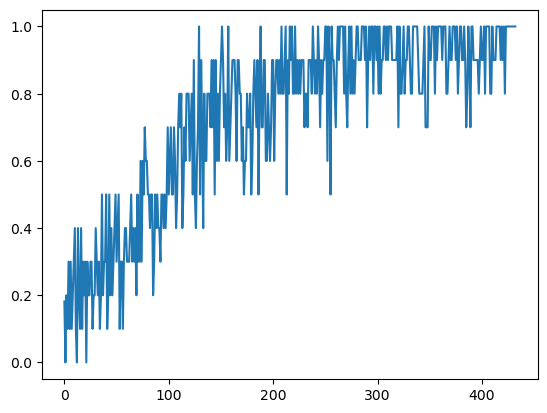

In [11]:
import matplotlib.pyplot as plt
plt.plot([0.18181818181818182, 0.0, 0.2, 0.1, 0.3, 0.1, 0.3, 0.1, 0.2, 0.3, 0.4, 0.1, 0.0, 0.4, 0.2, 0.1, 0.4, 0.1, 0.3, 0.2, 0.3, 0.0, 0.3, 0.2, 0.2, 0.3, 0.3, 0.1, 0.2, 0.2, 0.4, 0.3, 0.2, 0.3, 0.1, 0.2, 0.5, 0.2, 0.3, 0.3, 0.5, 0.1, 0.2, 0.5, 0.2, 0.4, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.5, 0.1, 0.3, 0.3, 0.1, 0.3, 0.4, 0.4, 0.3, 0.3, 0.3, 0.4, 0.5, 0.3, 0.4, 0.3, 0.4, 0.2, 0.5, 0.3, 0.3, 0.6, 0.3, 0.6, 0.5, 0.7, 0.6, 0.6, 0.5, 0.5, 0.4, 0.5, 0.5, 0.2, 0.3, 0.5, 0.4, 0.5, 0.4, 0.4, 0.3, 0.5, 0.5, 0.4, 0.5, 0.4, 0.5, 0.7, 0.5, 0.6, 0.7, 0.5, 0.5, 0.7, 0.6, 0.4, 0.5, 0.7, 0.8, 0.7, 0.8, 0.4, 0.5, 0.7, 0.6, 0.8, 0.8, 0.8, 0.6, 0.7, 0.8, 0.5, 0.9, 0.5, 0.4, 0.6, 0.7, 1.0, 0.5, 0.9, 0.7, 0.4, 0.8, 0.6, 0.6, 0.8, 0.8, 0.8, 0.7, 0.9, 0.7, 0.9, 0.5, 0.9, 0.6, 0.8, 0.6, 0.8, 0.9, 1.0, 0.9, 0.7, 0.8, 0.6, 0.7, 1.0, 0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.8, 0.6, 0.9, 0.9, 0.8, 0.8, 0.6, 0.7, 0.5, 0.6, 0.6, 0.8, 0.7, 0.7, 0.8, 0.5, 0.6, 0.8, 0.9, 0.8, 0.7, 0.9, 0.5, 0.8, 1.0, 0.7, 0.7, 0.9, 0.9, 0.6, 0.6, 0.8, 0.7, 0.6, 0.7, 0.9, 0.9, 0.6, 0.8, 0.9, 0.9, 0.8, 0.9, 0.8, 1.0, 0.8, 0.8, 0.9, 1.0, 0.5, 0.9, 0.8, 1.0, 0.9, 1.0, 0.8, 0.8, 1.0, 0.8, 0.9, 0.8, 0.9, 0.8, 0.9, 0.9, 0.9, 0.7, 0.8, 0.8, 0.7, 0.9, 0.9, 0.9, 0.8, 1.0, 0.9, 0.8, 0.9, 0.8, 1.0, 0.9, 0.7, 0.9, 0.8, 0.9, 0.9, 1.0, 1.0, 0.6, 1.0, 0.9, 0.5, 1.0, 0.9, 0.9, 0.8, 0.7, 0.9, 1.0, 0.9, 1.0, 1.0, 1.0, 1.0, 0.8, 1.0, 0.8, 0.7, 0.9, 1.0, 0.8, 1.0, 0.8, 0.9, 0.8, 0.9, 1.0, 1.0, 0.9, 0.9, 0.9, 1.0, 1.0, 1.0, 0.9, 1.0, 0.7, 0.9, 1.0, 0.9, 1.0, 1.0, 0.8, 1.0, 1.0, 0.9, 1.0, 0.8, 1.0, 0.8, 0.9, 0.9, 1.0, 1.0, 0.9, 1.0, 0.9, 1.0, 1.0, 1.0, 0.9, 0.9, 0.9, 0.9, 0.9, 1.0, 0.7, 1.0, 0.8, 0.8, 0.9, 1.0, 0.8, 0.9, 0.9, 1.0, 1.0, 0.9, 0.8, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.8, 0.8, 0.8, 0.8, 0.9, 1.0, 0.7, 0.7, 0.7, 1.0, 0.9, 0.9, 1.0, 1.0, 1.0, 0.8, 1.0, 0.9, 1.0, 1.0, 1.0, 1.0, 0.9, 1.0, 1.0, 1.0, 0.8, 0.8, 0.9, 1.0, 0.9, 0.9, 1.0, 1.0, 1.0, 0.9, 1.0, 0.8, 0.9, 1.0, 1.0, 0.9, 0.9, 1.0, 0.9, 0.7, 0.8, 1.0, 0.9, 0.7, 1.0, 1.0, 0.9, 0.9, 0.9, 0.9, 0.9, 0.8, 0.9, 1.0, 0.9, 0.9, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, 0.8, 0.8, 1.0, 0.9, 0.9, 0.9, 1.0, 1.0, 1.0, 1.0, 0.9, 1.0, 0.9, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

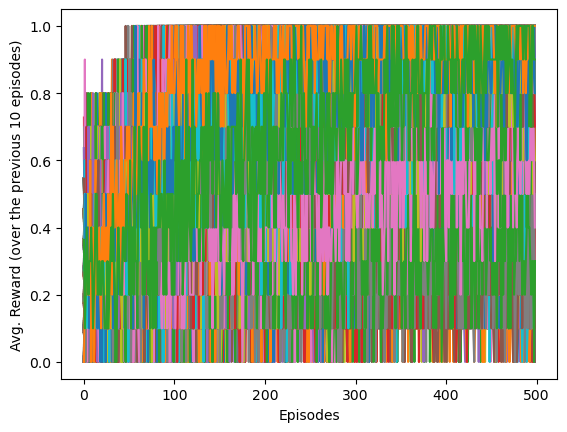

In [12]:
# plot all the reward curves (to see if there is any hope for a really nice one)
for i, row in df_ALL.iterrows():
    plt.plot(row['avgRewards'])

plt.xlabel("Episodes")
plt.ylabel("Avg. Reward (over the previous 10 episodes)")
plt.show()

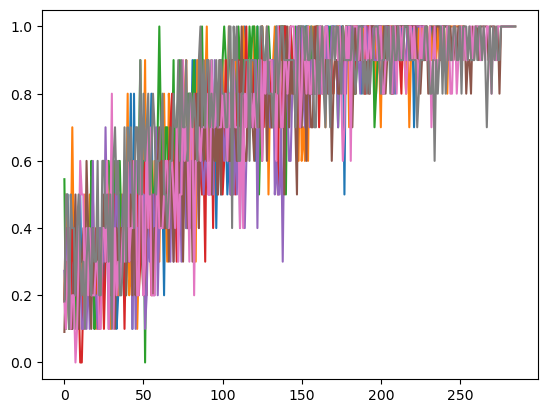

,Unnamed: 0,DQN_model,batch_size,gamma,eps_start,eps_end,eps_decay,learning_rate,memory_buffer,ams_grad,targetnet_update_rate,avgRewards,average_last_100_episodes,best_average_100_episodes,time_of_peak,time_to_convergence
350,350,1,32,0.99,0.90,0.01,500,0.0001,10000,False,20,"[0.18181818181818182, 0.2, 0.5, 0.3, 0.2, 0.1,...",1.0,1.0,2440,2440.0
467,467,1,64,0.99,0.80,0.01,500,0.0001,10000,True,20,"[0.18181818181818182, 0.5, 0.3, 0.1, 0.3, 0.7,...",1.0,1.0,2530,2530.0
560,560,1,128,0.80,0.90,0.00,500,0.0010,10000,True,20,"[0.5454545454545454, 0.1, 0.3, 0.1, 0.4, 0.4, ...",1.0,1.0,2200,2200.0
637,637,1,64,0.90,0.90,0.01,500,0.0001,5000,True,20,"[0.18181818181818182, 0.4, 0.2, 0.4, 0.1, 0.4,...",1.0,1.0,2270,2270.0
700,700,1,32,0.90,0.80,0.01,500,0.0001,10000,True,1,"[0.2727272727272727, 0.2, 0.4, 0.2, 0.2, 0.1, ...",1.0,1.0,2290,2290.0
757,757,1,32,0.90,0.95,0.01,500,0.0001,10000,True,1,"[0.09090909090909091, 0.3, 0.2, 0.3, 0.1, 0.1,...",1.0,1.0,2860,2860.0
777,777,1,128,0.80,0.80,0.00,500,0.0001,10000,False,20,"[0.18181818181818182, 0.1, 0.3, 0.4, 0.1, 0.2,...",1.0,1.0,2840,2840.0
877,878,1,64,0.99,0.80,0.01,500,0.0005,5000,True,20,"[0.18181818181818182, 0.5, 0.5, 0.1, 0.5, 0.4,...",1.0,1.0,2860,2860.0


In [13]:
# see the runs that achieved the highest average reward over 100 episodes

best = df_ALL.nlargest(50, ['best_average_100_episodes'])
best_short = best[best['time_of_peak'] < 3000]

X = np.arange(10, 5000, 10)

for i, row in best_short.iterrows():
    plt.plot(row['avgRewards'])
plt.show()


best_short.head(20)

# WEDNESDAY

In [15]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np


df_wedn = pd.read_excel('Grid_Results/wednesday_grid_0.xlsx')
df_wedn['avgRewards'] = df_wedn['avgRewards'].apply(lambda x: ast.literal_eval(x))

df_wedn.drop(df_wedn.filter(regex="Unname"), axis=1, inplace=True)
df_wedn[~df_wedn['time_to_convergence'].isna()].head()

,DQN_model,batch_size,gamma,eps_start,eps_end,eps_decay,learning_rate,memory_buffer,ams_grad,targetnet_update_rate,avgRewards,average_last_100_episodes,best_average_100_episodes,time_of_peak,time_to_convergence
192,1,32,0.90,0.9,0.00,1000,0.00010,5000,False,50,"[0.18181818181818182, 0.0, 0.2, 0.1, 0.3, 0.1,...",1.0,1.0,4330,4330.0
213,1,256,0.90,0.8,0.00,1000,0.00001,5000,True,10,"[0.2727272727272727, 0.2, 0.2, 0.3, 0.1, 0.2, ...",1.0,1.0,4590,4590.0
263,1,128,0.90,1.0,0.00,1000,0.00010,5000,True,10,"[0.45454545454545453, 0.2, 0.4, 0.0, 0.2, 0.3,...",1.0,1.0,4640,4640.0
304,1,32,0.90,0.9,0.00,1500,0.00010,5000,True,10,"[0.18181818181818182, 0.4, 0.3, 0.2, 0.0, 0.0,...",1.0,1.0,4640,4640.0
350,1,32,0.99,0.9,0.01,500,0.00010,10000,False,20,"[0.18181818181818182, 0.2, 0.5, 0.3, 0.2, 0.1,...",1.0,1.0,2440,2440.0


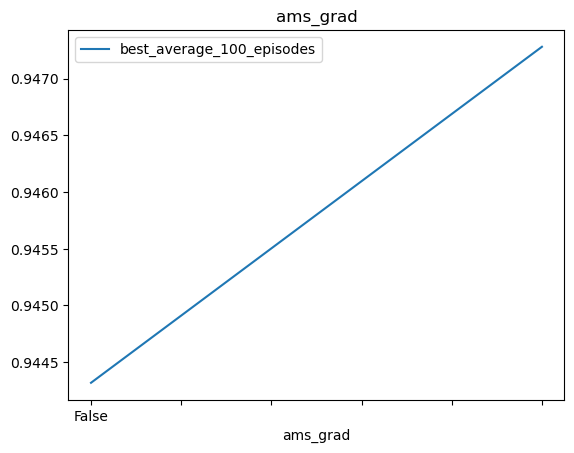

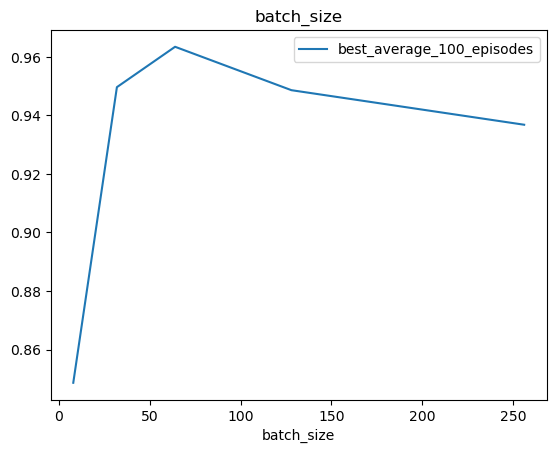

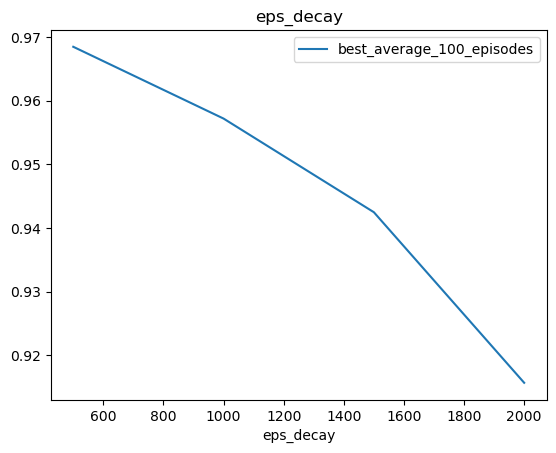

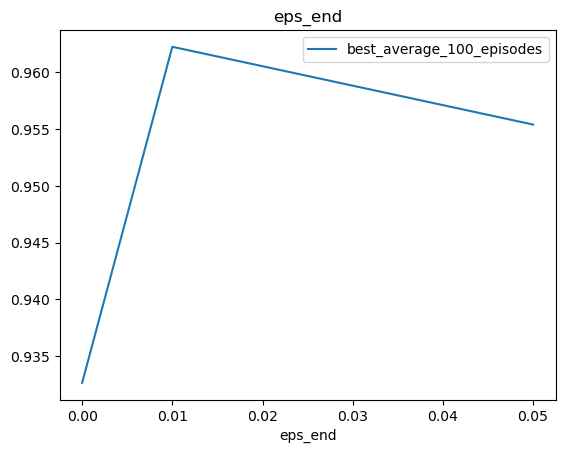

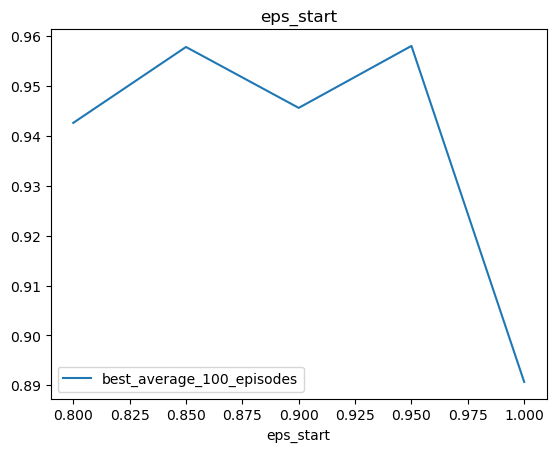

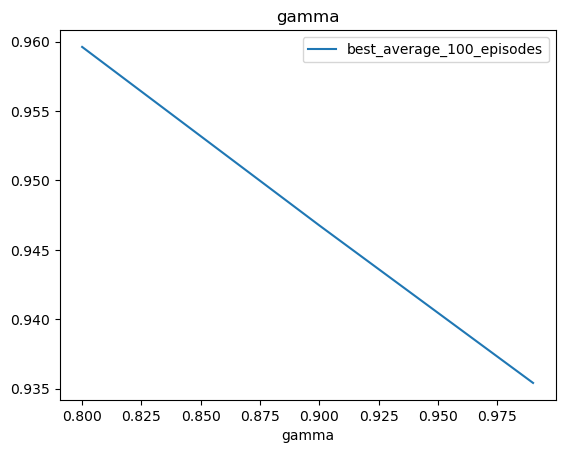

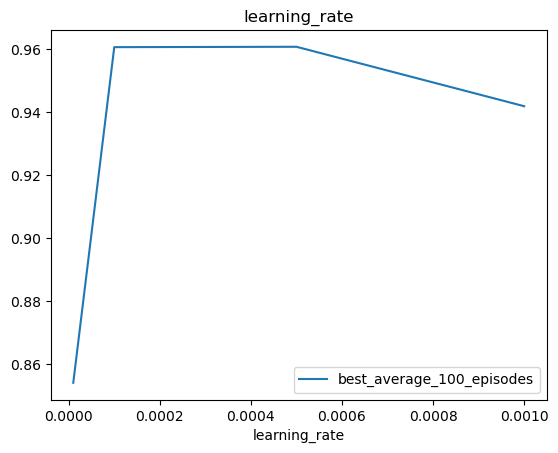

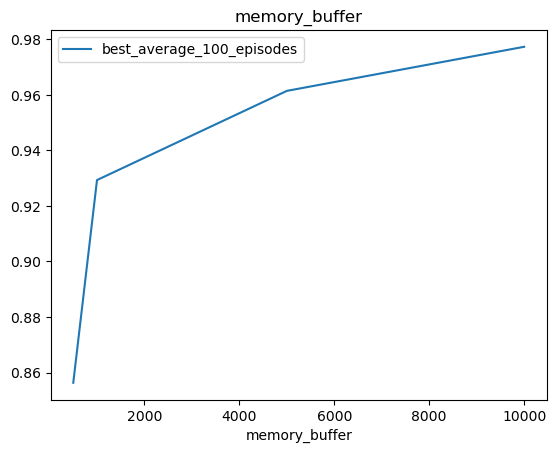

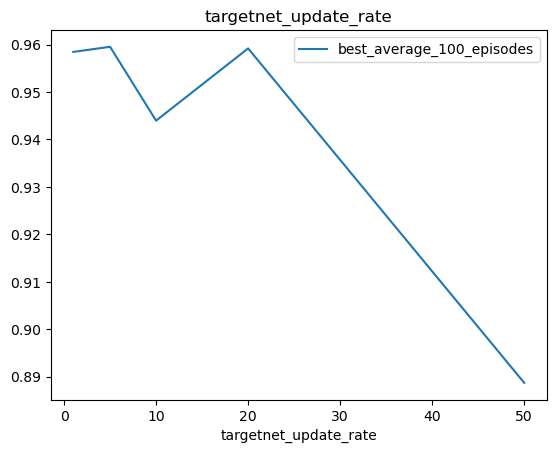

In [16]:
for param in param_columns:
    #print(param)

    df_wedn.groupby(param)['best_average_100_episodes'].mean().plot(legend=True, title=param)
    plt.show()

2200


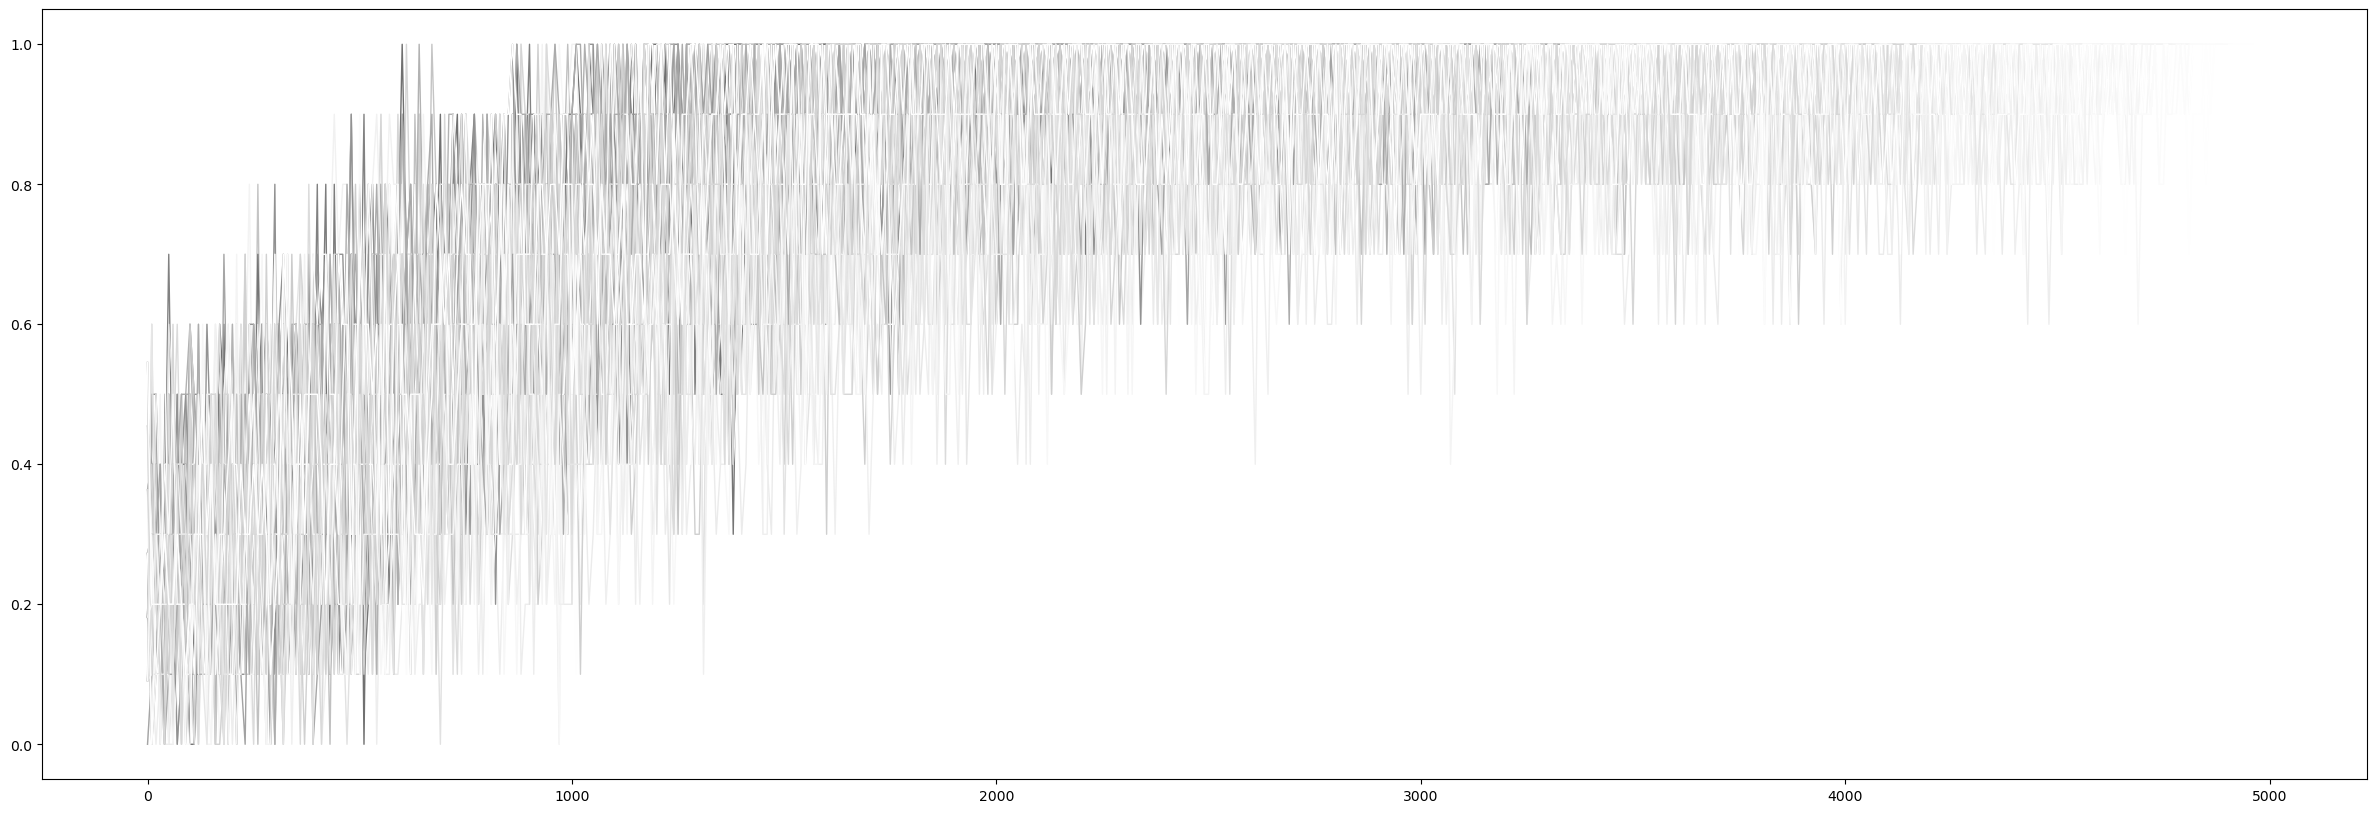

In [17]:
converged = df_wedn[~df_wedn['time_to_convergence'].isna()]
shortest = 5000
for i, row in converged.iterrows():
    length = len(row['avgRewards'])*10
    if length < shortest: 
        shortest = length

print(shortest)
plt.figure(figsize=(30, 10))
colours = plt.cm.gray(np.linspace(0, 1, 5000))


for i, row in converged.iterrows():
    length = len(row['avgRewards'])*10
    #print(length)
    x = np.arange(0, length, 10)
    plt.plot(x, row['avgRewards'], linewidth=1, color=colours[length])

In [27]:
top_20 = converged.nsmallest(20, 'time_to_convergence')#.value_counts
for col in top_20.columns:
    print(col, top_20[col].value_counts())

DQN_model 1    20
Name: DQN_model, dtype: int64
batch_size 32     7
128    6
64     5
256    2
Name: batch_size, dtype: int64
gamma 0.80    7
0.99    7
0.90    6
Name: gamma, dtype: int64
eps_start 0.80    9
0.95    5
0.90    4
0.85    2
Name: eps_start, dtype: int64
eps_end 0.01    10
0.00     9
0.05     1
Name: eps_end, dtype: int64
eps_decay 500     18
1000     2
Name: eps_decay, dtype: int64
learning_rate 0.0001    14
0.0005     4
0.0010     2
Name: learning_rate, dtype: int64
memory_buffer 10000    14
5000      6
Name: memory_buffer, dtype: int64
ams_grad True     14
False     6
Name: ams_grad, dtype: int64
targetnet_update_rate 20    9
1     4
10    4
5     3
Name: targetnet_update_rate, dtype: int64
avgRewards [0.5454545454545454, 0.1, 0.3, 0.1, 0.4, 0.4, 0.4, 0.1, 0.4, 0.4, 0.2, 0.2, 0.3, 0.3, 0.3, 0.2, 0.2, 0.6, 0.5, 0.1, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.6, 0.5, 0.6, 0.5, 0.4, 0.6, 0.4, 0.4, 0.5, 0.6, 0.4, 0.3, 0.2, 0.2, 0.5, 0.4, 0.5, 0.5, 0.5, 0.4, 0.4, 0.6, 0.9, 0.5, 0.6, 0.

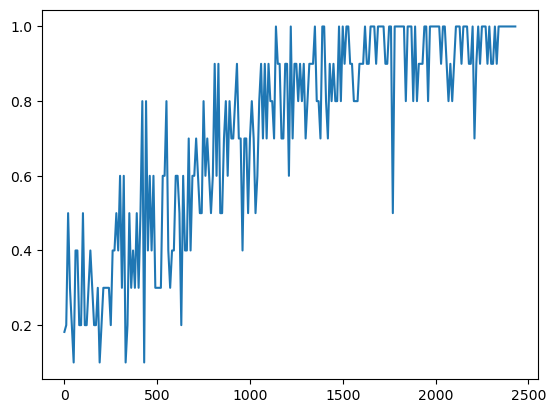

In [19]:
shortest = [0.18181818181818182, 0.2, 0.5, 0.3, 0.2, 0.1, 0.4, 0.4, 0.2, 0.2, 0.5, 0.2, 0.2, 0.3, 0.4, 0.3, 0.2, 0.2, 0.3, 0.1, 0.2, 0.3, 0.3, 0.3, 0.3, 0.2, 0.4, 0.4, 0.5, 0.4, 0.6, 0.3, 0.6, 0.1, 0.2, 0.5, 0.3, 0.4, 0.3, 0.5, 0.3, 0.5, 0.8, 0.1, 0.8, 0.4, 0.6, 0.4, 0.6, 0.3, 0.3, 0.3, 0.3, 0.6, 0.6, 0.8, 0.4, 0.3, 0.4, 0.4, 0.6, 0.6, 0.5, 0.2, 0.6, 0.4, 0.4, 0.7, 0.4, 0.6, 0.6, 0.7, 0.6, 0.5, 0.5, 0.8, 0.6, 0.7, 0.6, 0.5, 0.6, 0.9, 0.6, 0.9, 0.5, 0.5, 0.7, 0.8, 0.6, 0.8, 0.7, 0.7, 0.8, 0.9, 0.7, 0.7, 0.4, 0.7, 0.7, 0.5, 0.7, 0.8, 0.7, 0.5, 0.6, 0.8, 0.9, 0.7, 0.9, 0.7, 0.9, 0.8, 0.8, 0.7, 1.0, 0.9, 0.9, 0.7, 0.7, 0.9, 0.9, 0.6, 1.0, 0.7, 0.9, 0.9, 0.8, 0.9, 0.8, 0.9, 0.7, 0.8, 0.9, 0.9, 0.9, 1.0, 0.8, 0.8, 0.7, 1.0, 1.0, 0.8, 0.7, 0.9, 0.8, 0.9, 0.8, 0.8, 1.0, 0.8, 1.0, 0.9, 1.0, 1.0, 0.9, 0.9, 0.8, 0.8, 0.8, 0.9, 0.9, 0.9, 1.0, 0.9, 0.9, 1.0, 1.0, 1.0, 0.9, 1.0, 1.0, 1.0, 1.0, 0.9, 0.9, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 1.0, 1.0, 1.0, 0.8, 1.0, 0.8, 0.9, 0.9, 0.9, 1.0, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 1.0, 1.0, 0.9, 0.8, 0.9, 0.8, 0.9, 1.0, 1.0, 1.0, 0.9, 1.0, 1.0, 1.0, 0.9, 0.9, 1.0, 0.7, 0.9, 1.0, 0.9, 1.0, 1.0, 1.0, 0.9, 1.0, 0.9, 0.9, 1.0, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
x = np.arange(0, len(shortest)*10, 10)
plt.plot(x, shortest)